# Logistic Regession

Hồi quy logistic là một mô hình thống kê được sử dụng cho các nhiệm vụ phân loại nhị phân, mặc dù nó có thể được mở rộng cho các vấn đề đa lớp. Nó mô hình hóa xác suất mà một đầu vào nhất định thuộc về một lớp cụ thể. Ý tưởng chính là sử dụng hàm logistic (sigmoid) để ánh xạ các tính năng đầu vào tới giá trị xác suất trong khoảng từ 0 đến 1.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
train = pd.read_csv('data/train.csv')
dev = pd.read_csv('data/dev.csv')
test = pd.read_csv('data/test.csv')


train['free_text'] = train['free_text'].astype(str)
X_train = train['free_text']
y_train = train["label_id"]

dev['free_text'] = dev['free_text'].astype(str)
X_valid = dev['free_text']
y_valid = dev['label_id']

test['free_text'] = test['free_text'].astype(str)
X_test = test['free_text']
y_test = test['label_id']

Vector hóa TF-IDF

TF-IDF là viết tắt của Tần số tài liệu nghịch đảo tần số (Term Frequency-Inverse Document Frequency). Đó là một thống kê số nhằm phản ánh tầm quan trọng của một từ đối với một tài liệu trong một bộ sưu tập hoặc kho văn bản. Giá trị TF-IDF tăng tỷ lệ thuận với số lần một từ xuất hiện trong tài liệu nhưng được bù đắp bởi tần suất của từ đó trong kho ngữ liệu, điều này giúp điều chỉnh thực tế là một số từ nói chung xuất hiện thường xuyên hơn.

In [3]:
# Vectorize text using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_valid_tfidf = tfidf.transform(X_valid)
X_test_tfidf = tfidf.transform(X_test)

In [4]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [5]:
# Predict on validation set
y_valid_pred = model.predict(X_valid_tfidf)
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("Validation Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Predict on test set
y_test_pred = model.predict(X_test_tfidf)
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy:  0.8458616010854817
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      2876
         1.0       0.56      0.49      0.52       329
         2.0       0.54      0.78      0.64       480

    accuracy                           0.85      3685
   macro avg       0.69      0.72      0.70      3685
weighted avg       0.86      0.85      0.85      3685

Test Accuracy:  0.8360287030095319
Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      7377
           1       0.41      0.41      0.41       631
           2       0.56      0.71      0.62      1329

    accuracy                           0.84      9337
   macro avg       0.64      0.67      0.65      9337
weighted avg       0.85      0.84      0.84      9337



- Độ chính xác xác thực: 0,8776
- Kiểm tra độ chính xác: 0,8735
- F1 xác thực (Trung bình vĩ mô): 0,69
- F1 xác thực (Trung bình có trọng số): 0,86
- F1 bộ test (Trung bình vĩ mô): 0,66
- F1 bộ test (Trung bình có trọng số): 0,86

Các giá trị độ chính xác phản ánh tỷ lệ của tổng số dự đoán đúng, trong khi điểm F1 (cả vĩ mô và trọng số) cung cấp thông tin chi tiết về sự cân bằng giữa độ chính xác và khả năng thu hồi giữa các lớp khác nhau.

Độ chính xác, mức thu hồi và điểm F1 cho mỗi lớp cho biết mô hình hoạt động tốt như thế nào đối với từng nhãn cụ thể. Ví dụ: mô hình hoạt động tốt với lớp 0 nhưng gặp khó khăn hơn với lớp 1 và 2, đặc biệt là về khả năng thu hồi.

In [6]:
def classify_text(text):
    text_tfidf = tfidf.transform([text])  # Transform input text to TF-IDF
    prediction = model.predict(text_tfidf)  # Predict label
    return prediction[0]

In [7]:
example_text = "Haha dcm thằng ngu"
predicted_label = classify_text(example_text)
print(f"The predicted label for the input text is: {predicted_label}")

The predicted label for the input text is: 2


# Bi LSTM

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score


In [2]:
train = pd.read_csv('data/train.csv')
dev = pd.read_csv('data/dev.csv')
test = pd.read_csv('data/test.csv')


train['free_text'] = train['free_text'].astype(str)
X_train = train['free_text']
y_train = train["label_id"]

dev['free_text'] = dev['free_text'].astype(str)
X_valid = dev['free_text']
y_valid = dev['label_id']

test['free_text'] = test['free_text'].astype(str)
X_test = test['free_text']
y_test = test['label_id']

### choosing Maximum number of words to keep, based on word frequency

In [101]:
from keras.preprocessing.text import Tokenizer

# Initialize the tokenizer without specifying num_words initially
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
word_counts = tokenizer.word_counts

In [102]:
vocab_size = len(word_index)
print(f'Total vocabulary size: {vocab_size}')

Total vocabulary size: 10460


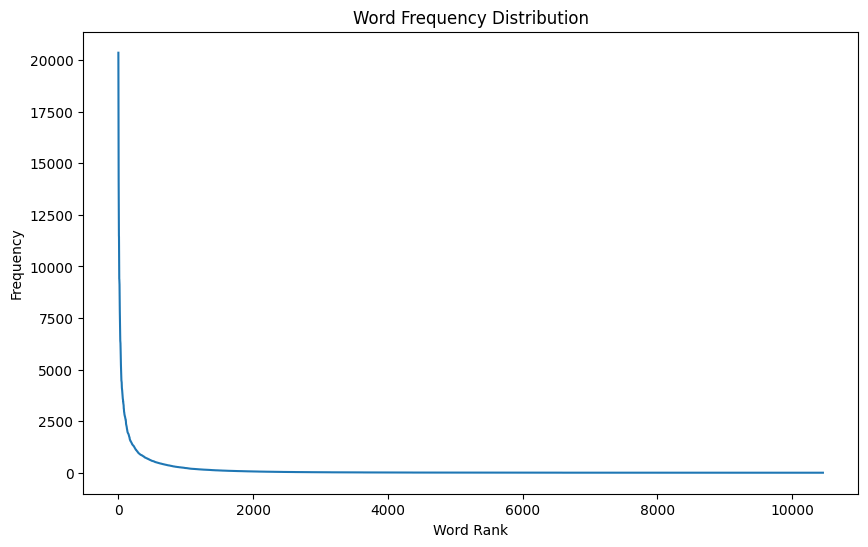

In [103]:
import matplotlib.pyplot as plt


sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
word_frequencies = [count for word, count in sorted_word_counts]

plt.figure(figsize=(10, 6))
plt.plot(word_frequencies)
plt.title('Word Frequency Distribution')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.show()

Since it flatten out in the early stage, that means small number of words are very common, while the majority of words are rare. <br>

So we use Coverage method to not ignore too many information

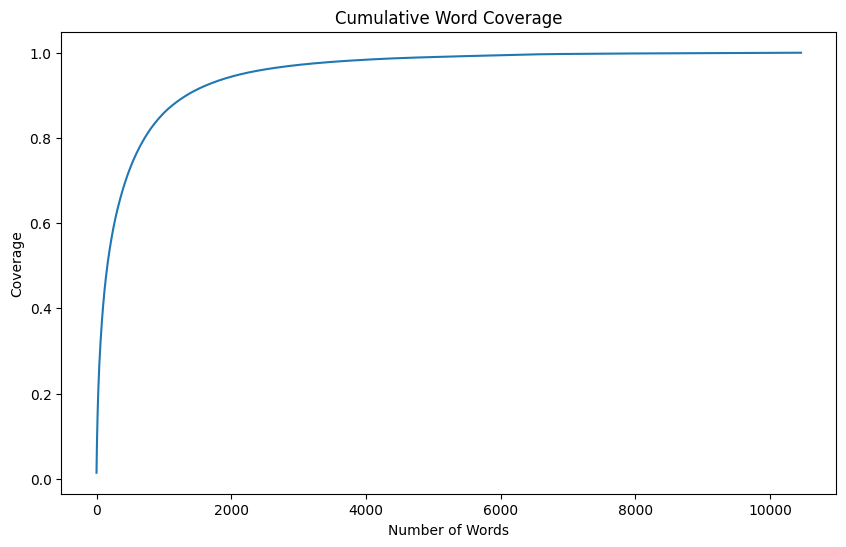

In [104]:
import numpy as np

cumulative_word_counts = np.cumsum(word_frequencies)
total_words = cumulative_word_counts[-1]

coverage = cumulative_word_counts / total_words

plt.figure(figsize=(10, 6))
plt.plot(coverage)
plt.title('Cumulative Word Coverage')
plt.xlabel('Number of Words')
plt.ylabel('Coverage')
plt.show()

In [107]:
coverage_1 = coverage[2000 - 1]
coverage_2 = coverage[3000 - 1]
coverage_3 = coverage[4000 - 1]
coverage_4 = coverage[6000 - 1]
coverage_5 = coverage[8000 - 1]
# coverage_15000 = coverage[15000 - 1]

print(f"Coverage with 2000 words: {coverage_1:.2%}")
print(f"Coverage with 3000 words: {coverage_2:.2%}")
print(f"Coverage with 4000 words: {coverage_3:.2%}")
print(f"Coverage with 6000 words: {coverage_4:.2%}")
print(f"Coverage with 8000 words: {coverage_5:.2%}")
# print(f"Coverage with 15000 words: {coverage_15000:.2%}")

Coverage with 2000 words: 94.37%
Coverage with 3000 words: 97.14%
Coverage with 4000 words: 98.36%
Coverage with 6000 words: 99.42%
Coverage with 8000 words: 99.83%


### model

In [3]:
# Tokenize and pad sequences
max_words = 4000
max_len = 100     # Maximum length of sequence

# Define the biLSTM model
embedding_dim = 100

In [4]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_valid_seq = tokenizer.texts_to_sequences(X_valid)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_valid_pad = pad_sequences(X_valid_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [5]:
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax') 
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          400000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_valid_pad, y_valid), callbacks=[early_stopping])

Epoch 1/10
542/542 [==============================] - 44s 61ms/step - loss: 0.6073 - accuracy: 0.7441 - val_loss: 0.4886 - val_accuracy: 0.8125
Epoch 2/10
542/542 [==============================] - 34s 63ms/step - loss: 0.4200 - accuracy: 0.8402 - val_loss: 0.4897 - val_accuracy: 0.8214
Epoch 3/10
542/542 [==============================] - 34s 63ms/step - loss: 0.3019 - accuracy: 0.8906 - val_loss: 0.5580 - val_accuracy: 0.8122
Epoch 4/10
542/542 [==============================] - 34s 63ms/step - loss: 0.2190 - accuracy: 0.9231 - val_loss: 0.6437 - val_accuracy: 0.7989


In [86]:
model.save('result/biLSTM_model_reddit.h5')
import pickle
with open('result/tokenizer_reddit.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
# Evaluate the model on the validation set
y_valid_pred_prob = model.predict(X_valid_pad)
y_valid_pred = np.argmax(y_valid_pred_prob, axis=1)
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("Validation Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

116/116 [==============================] - 5s 21ms/step
Validation Accuracy:  0.812483039348711
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      2876
         1.0       0.42      0.54      0.47       329
         2.0       0.51      0.72      0.60       480

    accuracy                           0.81      3685
   macro avg       0.63      0.71      0.66      3685
weighted avg       0.85      0.81      0.83      3685

292/292 [==============================] - 6s 21ms/step
Test Accuracy:  0.8203919888615187
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7377
           1       0.34      0.52      0.41       631
           2       0.56      0.68      0.61      1329

    accuracy                           0.82      9337
   macro avg       0.62      0.69      0.64      9337
weighted avg       0.85      0.82      0.8

In [47]:
def classify_text(text):
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_len)
    prediction_prob = model.predict(text_pad)
    prediction = np.argmax(prediction_prob, axis=1)
    return prediction[0]

In [51]:
# Test the function with an example input
example_text = "mẹ mày rất đần"
predicted_label = classify_text(example_text)
print(f"The predicted label for the input text is: {predicted_label}")


1/1 [==============================] - 0s 46ms/step
The predicted label for the input text is: 2


### find optimal hidden layers

In [11]:
import matplotlib.pyplot as plt

def create_bilstm_model(num_layers):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
    for _ in range(num_layers - 1):
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes: 0, 1, 2
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [12]:
def train_and_evaluate(num_layers):
    model = create_bilstm_model(num_layers)
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_valid_pad, y_valid), callbacks=[early_stopping], verbose=0)
    return history

In [13]:
layer_counts = [1, 2, 3, 4]
histories = {}

for num_layers in layer_counts:
    history = train_and_evaluate(num_layers)
    histories[num_layers] = history.history
    print(f"Number of layers: {num_layers}, Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")

Number of layers: 1, Best Validation Accuracy: 0.8250
Number of layers: 2, Best Validation Accuracy: 0.8383
Number of layers: 3, Best Validation Accuracy: 0.8163
Number of layers: 4, Best Validation Accuracy: 0.8250


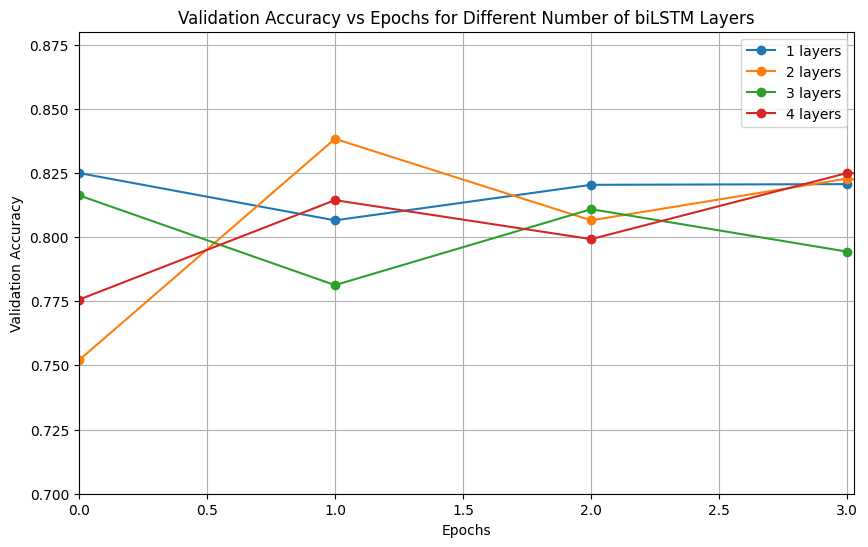

In [27]:
plt.figure(figsize=(10, 6))
for num_layers, history in histories.items():
    plt.plot(history['val_accuracy'], marker='o', label=f'{num_layers} layers')

plt.title('Validation Accuracy vs Epochs for Different Number of biLSTM Layers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.ylim(0.7, 0.88)

plt.show()

### find optimal dropout rate

In [16]:
def create_bilstm_model(dropout_rate):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [18]:
# Function to train and evaluate model
def train_and_evaluate(dropout_rate):
    model = create_bilstm_model(dropout_rate)
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_valid_pad, y_valid), callbacks=[early_stopping], verbose=0)
    return history.history['val_accuracy']

In [20]:
# Train models with different dropout rates and log accuracy
dropout_rates = [0.2, 0.3, 0.4, 0.5]
epoch_accuracies = {rate: [] for rate in dropout_rates}

for rate in dropout_rates:
    val_accuracies = train_and_evaluate(rate)
    epoch_accuracies[rate] = val_accuracies
    print(f"Dropout rate: {rate}, Validation Accuracies: {val_accuracies}")

Dropout rate: 0.2, Validation Accuracies: [0.8458083868026733, 0.8506736755371094, 0.8566616773605347, 0.852544903755188, 0.8506736755371094, 0.8491766452789307, 0.847305417060852, 0.8446856141090393]
Dropout rate: 0.3, Validation Accuracies: [0.847305417060852, 0.8484281301498413, 0.853667676448822, 0.8502994179725647, 0.8506736755371094, 0.84992516040802, 0.8491766452789307, 0.8484281301498413]
Dropout rate: 0.4, Validation Accuracies: [0.846182644367218, 0.847305417060852, 0.8443113565444946, 0.853667676448822, 0.851422131061554, 0.8506736755371094, 0.847305417060852, 0.8443113565444946, 0.8446856141090393, 0.841317355632782]
Dropout rate: 0.5, Validation Accuracies: [0.836452066898346, 0.84992516040802, 0.853667676448822, 0.851047933101654, 0.848802387714386, 0.8506736755371094, 0.8446856141090393, 0.8446856141090393, 0.84393709897995]


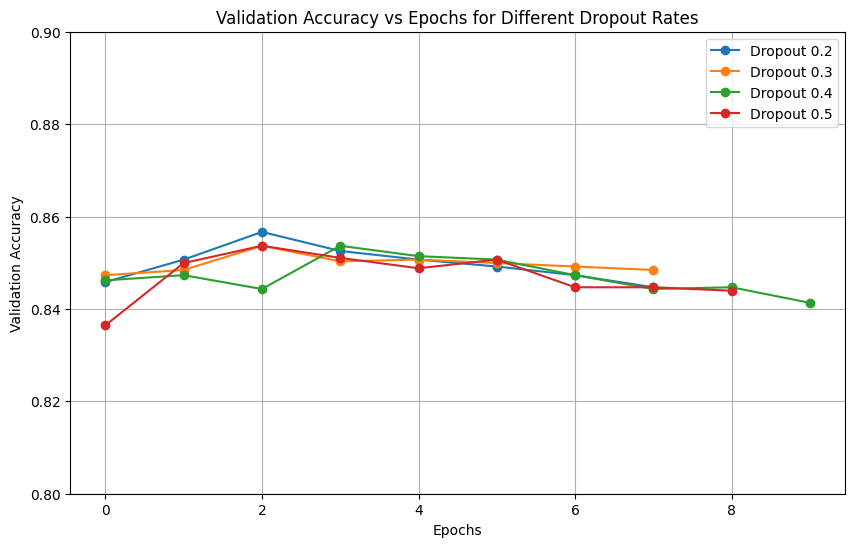

In [22]:
plt.figure(figsize=(10, 6))
for rate in dropout_rates:
    plt.plot(epoch_accuracies[rate], marker='o', label=f'Dropout {rate}')
plt.title('Validation Accuracy vs Epochs for Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.ylim(0.8,0.88)
plt.show()


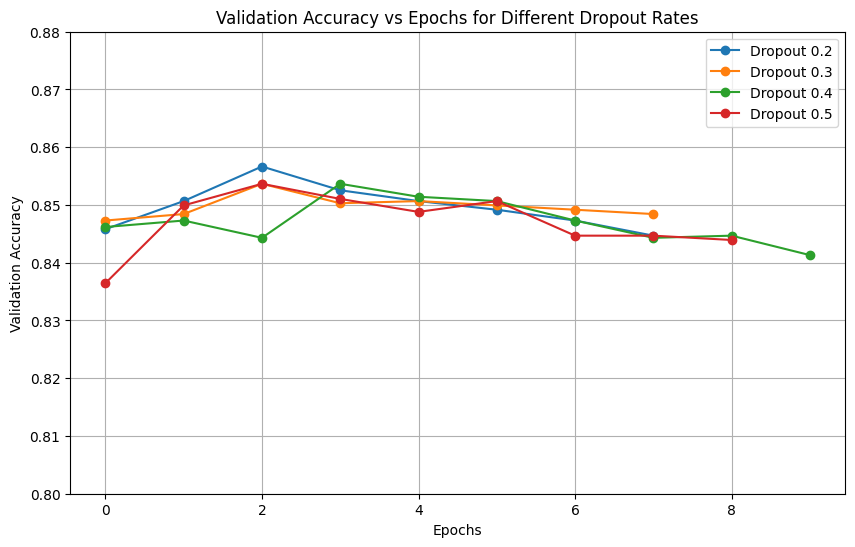

In [35]:
plt.figure(figsize=(10, 6))
for rate in dropout_rates:
    plt.plot(epoch_accuracies[rate], marker='o', label=f'Dropout {rate}')
plt.title('Validation Accuracy vs Epochs for Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.ylim(0.8,0.88)
plt.show()

### find optimal units rate

In [5]:
def create_bilstm_model(lstm_units):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [10]:
def train_and_evaluate(lstm_units):
    model = create_bilstm_model(lstm_units)
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_valid_pad, y_valid), callbacks=[early_stopping], verbose=0)
    return history.history['val_accuracy']


In [8]:
lstm_units_list = [32, 64, 128, 256]
epoch_accuracies = {units: [] for units in lstm_units_list}

In [11]:
for units in lstm_units_list:
    val_accuracies = train_and_evaluate(units)
    epoch_accuracies[units] = val_accuracies
    print(f"LSTM units: {units}, Validation Accuracies: {val_accuracies}")

LSTM units: 32, Validation Accuracies: [0.8465569019317627, 0.8502994179725647, 0.851422131061554, 0.855164647102356, 0.8502994179725647, 0.8480538725852966, 0.834955096244812]
LSTM units: 64, Validation Accuracies: [0.8484281301498413, 0.8517963886260986, 0.853667676448822, 0.8529191613197327, 0.853667676448822, 0.847679615020752, 0.838697612285614, 0.84356290102005]
LSTM units: 128, Validation Accuracies: [0.851047933101654, 0.851422131061554, 0.8446856141090393, 0.84992516040802, 0.84992516040802, 0.8506736755371094, 0.8491766452789307]
LSTM units: 256, Validation Accuracies: [0.8484281301498413, 0.8495509028434753, 0.8454341292381287, 0.852544903755188, 0.8431886434555054, 0.8540419340133667, 0.8555389046669006]


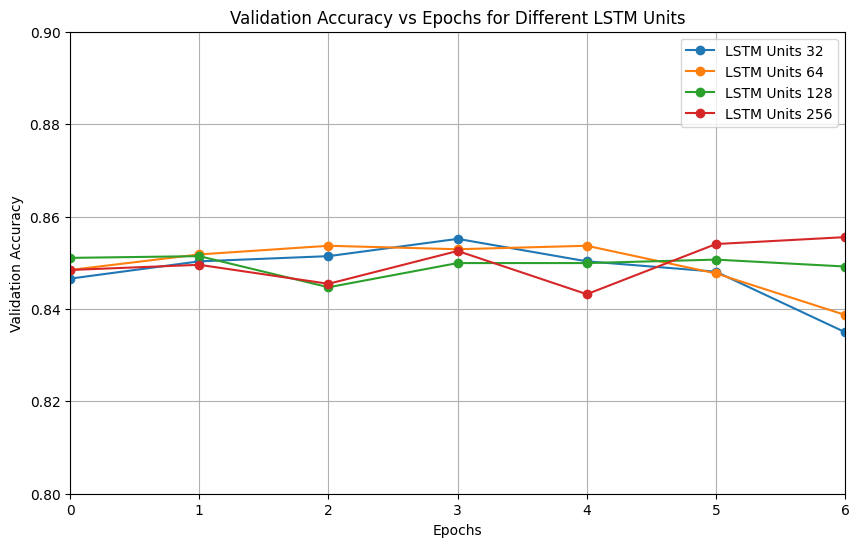

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for units in lstm_units_list:
    plt.plot(epoch_accuracies[units], marker='o', label=f'LSTM Units {units}')
plt.title('Validation Accuracy vs Epochs for Different LSTM Units')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.ylim(0.8,0.9)
plt.xlim(0,6)

plt.show()

--> choose 256 units

### find optimal dense

In [37]:
def create_bilstm_model(dense_units):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dropout(0.3))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [40]:
# Function to train and evaluate model
def train_and_evaluate(dense_units):
    model = create_bilstm_model(dense_units)
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_valid_pad, y_valid), callbacks=[early_stopping], verbose=0)
    return history.history['val_accuracy']

# Train models with different numbers of Dense units and log accuracy
dense_units_list = [32, 64, 128, 256]
epoch_accuracies = {units: [] for units in dense_units_list}

In [41]:
for units in dense_units_list:
    val_accuracies = train_and_evaluate(units)
    epoch_accuracies[units] = val_accuracies
    print(f"Dense units: {units}, Validation Accuracies: {val_accuracies}")

Dense units: 32, Validation Accuracies: [0.8495509028434753, 0.8491766452789307, 0.863772451877594, 0.8544161915779114, 0.8570359349250793, 0.8379490971565247]
Dense units: 64, Validation Accuracies: [0.8495509028434753, 0.8502994179725647, 0.8544161915779114, 0.8577844500541687]
Dense units: 128, Validation Accuracies: [0.8566616773605347, 0.858907163143158, 0.85628741979599, 0.8443113565444946, 0.84992516040802]
Dense units: 256, Validation Accuracies: [0.852544903755188, 0.8577844500541687, 0.8532934188842773, 0.847305417060852, 0.845059871673584]


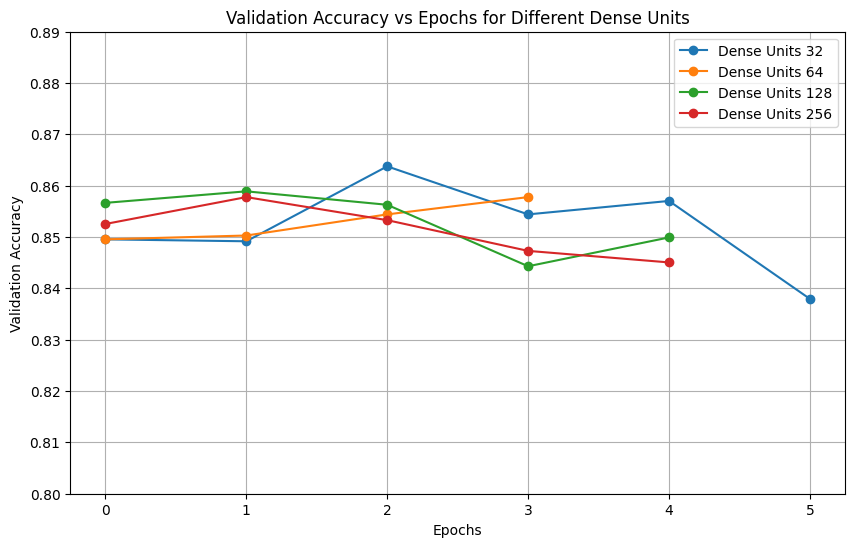

In [43]:
plt.figure(figsize=(10, 6))

for units in dense_units_list:
    plt.plot(epoch_accuracies[units], marker='o', label=f'Dense Units {units}')
plt.title('Validation Accuracy vs Epochs for Different Dense Units')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.ylim(0.8,0.89)
plt.show()

# model Bi LSTM combine with CNN

In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Layer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf

In [6]:
class CustomCNNLayer(Layer):
    def __init__(self, n_filters, filter_sizes, embedding_dim, dropout_rate):
        super(CustomCNNLayer, self).__init__()
        self.convs = [
            Conv1D(filters=n_filters, kernel_size=fs, activation='relu', padding='same')
            for fs in filter_sizes
        ]
        self.dropout = Dropout(dropout_rate)

    def call(self, x):
        conv_outputs = [conv(x) for conv in self.convs]
        x = tf.concat(conv_outputs, axis=-1)  # Concatenate along the filters axis
        x = self.dropout(x)
        return x

In [7]:
# Model parameters
max_words = 4000
max_len = 100
embedding_dim = 100
n_filters = 128
filter_sizes = [1, 2, 3, 5]
dropout_rate = 0.3

In [8]:
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    CustomCNNLayer(n_filters, filter_sizes, embedding_dim, dropout_rate),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          400000    
                                                                 
 custom_cnn_layer (CustomCNN  (None, 100, 512)         141312    
 Layer)                                                          
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         656384    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_data=(X_valid_pad, y_valid), callbacks=[early_stopping])

Epoch 1/10
542/542 [==============================] - 62s 82ms/step - loss: 0.6069 - accuracy: 0.7457 - val_loss: 0.5199 - val_accuracy: 0.7973
Epoch 2/10
542/542 [==============================] - 37s 69ms/step - loss: 0.3757 - accuracy: 0.8602 - val_loss: 0.4769 - val_accuracy: 0.8336
Epoch 3/10
542/542 [==============================] - 37s 68ms/step - loss: 0.2300 - accuracy: 0.9206 - val_loss: 0.5561 - val_accuracy: 0.8369
Epoch 4/10
542/542 [==============================] - 37s 69ms/step - loss: 0.1398 - accuracy: 0.9526 - val_loss: 0.6678 - val_accuracy: 0.8320
Epoch 5/10
542/542 [==============================] - 36s 66ms/step - loss: 0.0969 - accuracy: 0.9690 - val_loss: 0.6281 - val_accuracy: 0.8613


In [20]:
# Evaluate the model on the validation set
y_valid_pred_prob = model.predict(X_valid_pad)
y_valid_pred = np.argmax(y_valid_pred_prob, axis=1)
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("Validation Classification Report:\n", classification_report(y_valid, y_valid_pred))

# Evaluate the model on the test set
y_test_pred_prob = model.predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

116/116 [==============================] - 5s 22ms/step
Validation Accuracy:  0.835549525101764
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.92      2876
         1.0       0.52      0.53      0.53       329
         2.0       0.53      0.78      0.63       480

    accuracy                           0.84      3685
   macro avg       0.67      0.73      0.69      3685
weighted avg       0.86      0.84      0.84      3685

292/292 [==============================] - 6s 22ms/step
Test Accuracy:  0.8273535396808397
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      7377
           1       0.39      0.50      0.44       631
           2       0.54      0.69      0.61      1329

    accuracy                           0.83      9337
   macro avg       0.63      0.69      0.65      9337
weighted avg       0.85      0.83      0.8

# model Bi LSTM combine with attentions

In [63]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Layer
import tensorflow.keras.backend as K

In [ ]:
#model without attentions
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax') 
])

In [57]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import  Callback

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [58]:
# Custom callback to store accuracy and runtime
class TimingCallback(Callback):
    def on_train_begin(self, logs=None):
        self.times = []
        self.epoch_start_time = None
    
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()
    
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_start_time)

# Timing callback
timing_callback_no_attention = TimingCallback()

In [59]:
# Train the model without attention
history_no_attention = model.fit(X_train_pad, y_train, epochs=10, batch_size=128,validation_data=(X_valid_pad, y_valid),  callbacks=[early_stopping, timing_callback_no_attention])

Epoch 1/10
254/254 [==============================] - 26s 71ms/step - loss: 0.4895 - accuracy: 0.8298 - val_loss: 0.3797 - val_accuracy: 0.8529
Epoch 2/10
254/254 [==============================] - 15s 60ms/step - loss: 0.3675 - accuracy: 0.8634 - val_loss: 0.3574 - val_accuracy: 0.8703
Epoch 3/10
254/254 [==============================] - 16s 61ms/step - loss: 0.3269 - accuracy: 0.8807 - val_loss: 0.3476 - val_accuracy: 0.8830
Epoch 4/10
254/254 [==============================] - 15s 59ms/step - loss: 0.2967 - accuracy: 0.8901 - val_loss: 0.3530 - val_accuracy: 0.8809
Epoch 5/10
254/254 [==============================] - 15s 60ms/step - loss: 0.2617 - accuracy: 0.9030 - val_loss: 0.3797 - val_accuracy: 0.8714
Epoch 6/10
254/254 [==============================] - 15s 61ms/step - loss: 0.2322 - accuracy: 0.9167 - val_loss: 0.4391 - val_accuracy: 0.8627


In [60]:
# Store accuracy and runtime
accuracy_no_attention = history_no_attention.history['accuracy']
val_accuracy_no_attention = history_no_attention.history['val_accuracy']
times_no_attention = timing_callback_no_attention.times

In [64]:

# Custom attention layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)



In [68]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="glorot_uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

In [13]:
# Model with attention
model_attention = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32, return_sequences=True)),
    AttentionLayer(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

In [ ]:
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    # Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(128)),
    AttentionLayer(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax') 
])

In [14]:
# Compile the model
model_attention.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Timing callback
timing_callback_attention = TimingCallback()

In [15]:
# Train the model with attention
history_attention = model_attention.fit(X_train_pad, y_train, epochs=10, batch_size=128,validation_data=(X_valid_pad, y_valid), callbacks=[early_stopping, timing_callback_attention])

Epoch 1/10
376/376 [==============================] - 100s 243ms/step - loss: 0.5375 - accuracy: 0.8306 - val_loss: 0.4197 - val_accuracy: 0.8539
Epoch 2/10
376/376 [==============================] - 83s 221ms/step - loss: 0.4225 - accuracy: 0.8602 - val_loss: 0.3915 - val_accuracy: 0.8659
Epoch 3/10
376/376 [==============================] - 83s 221ms/step - loss: 0.4043 - accuracy: 0.8649 - val_loss: 0.3752 - val_accuracy: 0.8706
Epoch 4/10
376/376 [==============================] - 82s 219ms/step - loss: 0.3873 - accuracy: 0.8690 - val_loss: 0.3602 - val_accuracy: 0.8735
Epoch 5/10
376/376 [==============================] - 84s 225ms/step - loss: 0.3755 - accuracy: 0.8711 - val_loss: 0.3462 - val_accuracy: 0.8791
Epoch 6/10
376/376 [==============================] - 100s 265ms/step - loss: 0.3586 - accuracy: 0.8768 - val_loss: 0.3281 - val_accuracy: 0.8868
Epoch 7/10
376/376 [==============================] - 87s 231ms/step - loss: 0.3439 - accuracy: 0.8822 - val_loss: 0.3221 - val_

In [16]:
# Store accuracy and runtime
accuracy_attention = history_attention.history['accuracy']
val_accuracy_attention = history_attention.history['val_accuracy']
times_attention = timing_callback_attention.times

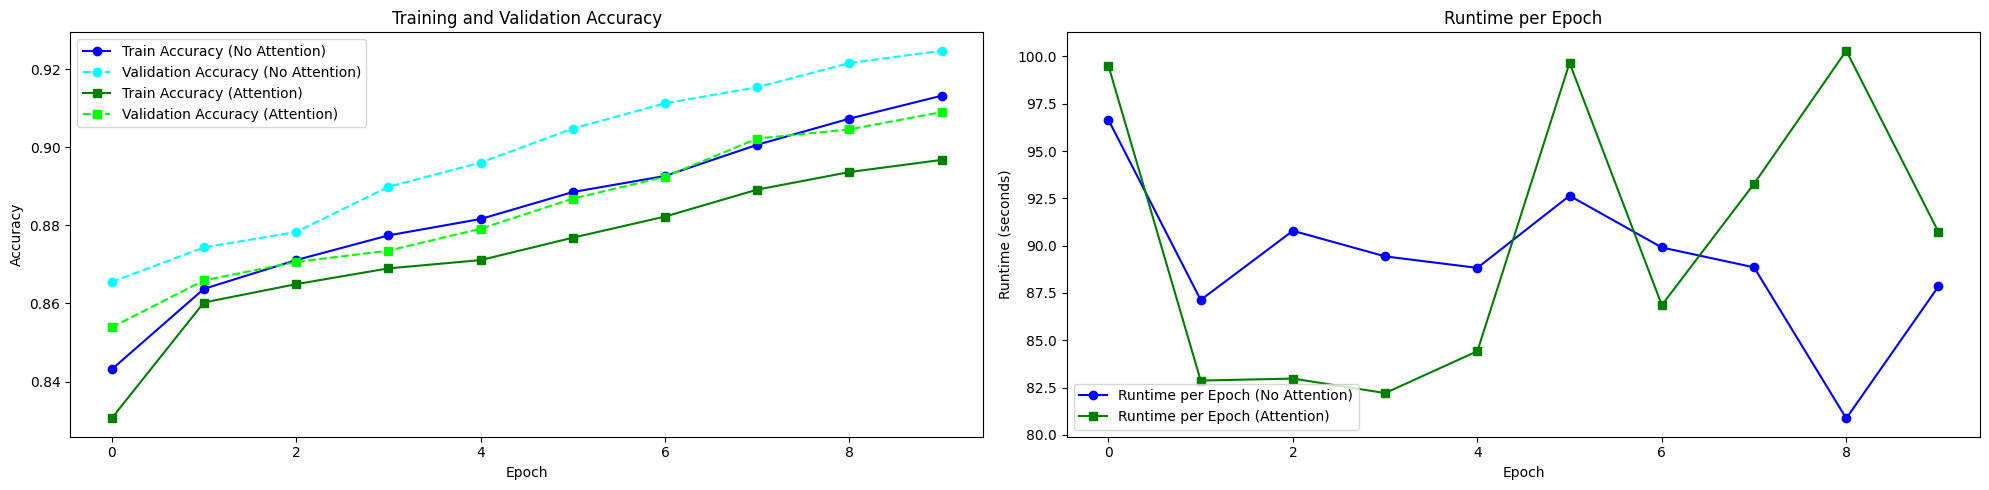

In [26]:
# Plot accuracy comparison
plt.figure(figsize=(20, 5))
# plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracy_no_attention, marker='o', label='Train Accuracy (No Attention)', color='blue')
plt.plot(val_accuracy_no_attention, marker='o', linestyle='--', label='Validation Accuracy (No Attention)', color='aqua')
plt.plot(accuracy_attention, marker='s', label='Train Accuracy (Attention)', color='green')
plt.plot(val_accuracy_attention, marker='s', linestyle='--', label='Validation Accuracy (Attention)', color='lime')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Runtime comparison
plt.subplot(1, 2, 2)
plt.plot(times_no_attention, marker='o', label='Runtime per Epoch (No Attention)', color='blue')
plt.plot(times_attention, marker='s', label='Runtime per Epoch (Attention)', color='green')
plt.xlabel('Epoch')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime per Epoch')
plt.legend()

plt.tight_layout()
plt.show()